# Hands-on Machine Learning with Scikit-learn and Tensorflow
## 03 Classification
This jupyter notebook is just a recitation of the classification project in the book [Hands-on Machine Learning with Scikit-Learn and TensorFlow](https://github.com/ageron/handson-ml). I just add custom notes for my own comprehension. But all the credits goes to __Aurélien Géron__. <br>
You can check the official notebook : https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb.

## Imports

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

### Take a look

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [7]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

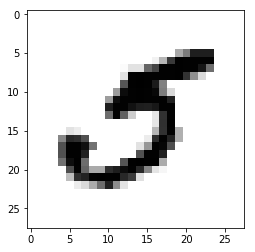

In [8]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest') # good practice

In [9]:
y[36000]

5.0

### Create a test set
Before analyze more the data, we need to create a test set. The MNIST dataset is already split into a training set and a test set.

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [11]:
X_train.shape

(60000, 784)

But we need to shuffle the training set.

In [12]:
import numpy as np

In [13]:
shuffle_index = np.random.permutation(60000)

In [14]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a binary classifier

In [16]:
y_train_5 = (y_train == 5) # very good !
y_test_5 = (y_test == 5)

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
sgd_clf = SGDClassifier(random_state=42)

In [20]:
sgd_clf.fit(X_train, y_train_5)

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [21]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)